In [1]:
en_text = "A dog run back corner near spare bedrooms"
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\4lab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'dog', 'run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [3]:
print(en_text.split())

['A', 'dog', 'run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [4]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())
'''
위의 예제에서는 사과란 단어가 총 4번 등장
'의,를,가,랑' 이 붙어있어서 이를 제거해주지 않으면 기게는 전부 다른 단어로 인식
따라서, 이를 위해 한국어는 보편적으로 형태소 분석기로 토큰화 시행 // mecab을 사용할 예정
'''

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


"\n위의 예제에서는 사과란 단어가 총 4번 등장\n'의,를,가,랑' 이 붙어있어서 이를 제거해주지 않으면 기게는 전부 다른 단어로 인식\n따라서, 이를 위해 한국어는 보편적으로 형태소 분석기로 토큰화 시행 // mecab을 사용할 예정\n"

In [5]:
# dicpath라는 Parameter 지정
# Mecab의 형태소 단위 토크나이징 수행 후 토큰화 진행
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [6]:
mecab.morphs("아버지가방에들어가신다")

['아버지', '가', '방', '에', '들어가', '신다']

In [7]:
# 품사 태깅
mecab.pos("아버지가방에들어가신다")

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EC')]

In [8]:
from konlpy.tag import Okt, Komoran, Mecab, Hannanum, Kkma

def get_tokenizer(tokenizer_name):
    if tokenizer_name == "komoran":
        tokenizer = Komoran()
    elif tokenizer_name == "okt":
        tokenizer = Okt()
    elif tokenizer_name == "mecab":
        tokenizer = Mecab(dicpath=r"c:\mecab\mecab-ko-dic")
    elif tokenizer_name == "hannanum":
        tokenizer = Hannanum()
    elif tokenizer_name == "kkma":
        tokenizer = Kkma()
    else:
        tokenizer = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
    return tokenizer

In [9]:
import time
import pandas as pd

time_list = []
tokenizer_list = ["komoran", "okt", "mecab", "hannanum", "kkma"]

for i in tokenizer_list:
    start = time.time() 
    tokenizer = get_tokenizer(i)
    tokenizer.morphs("""한국어 자연어 처리 분야에 정말 괜찮은 책이 나왔다
    출간되자 마자 읽어 보고 저자의 내공에 참 놀랐다
    이렇게 좋은 품질의 도서가 더 많이 나와야 한다고 생각하는 입장에서 저자에게 고마울 따름이다
    하지만 네이버 책정보에도 YES24에도 이제까지 연결된 리뷰가 하나도 없다는 점이 좀 의아했다
    네이버 블로그 리뷰는 좀 있음에도 그 이유는 아마도 책 제목 때문이 아닐까 싶었다
    아무래도 입문자 분들이 많이 봐야 할텐데 인공지능이나 딥러닝 같은 키워드가 아닌 한국어 임베딩이라고 제목이 달려있으니
    뭔가 다른 기술이거나 아니면 매우 작은 범위의 기술로 착각할 수 있기 때문이다
    임베딩은 자연어 처리 뿐만 아니라 컴퓨터 비전 음성에서도 매우 중요한 키워드가 됐다
    나 같은 경우 딥러닝 공부 초창기에 GAN에서 임베딩이라는 개념을 처음 접하게 되었는데 이걸 이해하려고 고생했던 기억이 있다
    딥러닝을 공부하면 할 수록 임베딩이라는 용어는 여러 개념을 관통하는 너무나 중요한 용어다.
    이 책은 최신 자연어 처리 기술을 포함하고 있으며 이를 한국어에 맞게 적용할 수 있도록 일목요연하게 설명한 책이다
    특히 저자의 언어로 이러한 기술들을 설명한 점이 가장 중요하다
    최근 자연어 처리 기술이 BERT를 통해 퀀텀 점프를 하였고 XLNet과 같은 후속 연구가 빠르게 진행되면서 급속하게 발전하고 있다
    저자는 BERT까지만 다루었는데 XLNet 같은 경우 직접 실험해보니 BERT보다 성능이 부족하다 판단하여 제외했다는 언급이 있다
    이러한 부분이 책의 신뢰성을 더 높인다고 생각한다
    직접 실험해보고 고민해보고 이해한 흔적이 저자만의 언어로 설명되면 독자는 더 많은 통찰을 얻을 수 있다
    데이터를 다루는 부분부터 소스코드도 괜찮고 그림 설명도 훌륭하다
    다만 코드를 마이크로하게 설명하는 부분은 부족하여 입문자 분들에겐 힘들수도 있지만 그래도 중요한 부분은 모두 언급했기 때문에 나쁘지 않다고 생각한다
    한국어 용어도 내 입장에서는 매우 마음에 들었다
    영어 발음 그대로 한국어로 쓰는 것을 싫어하시는 분들도 계시겠지만 결국 최신 기술은 영어 논문을 읽어야 하기 때문에 어설프게 한국어로 번역된 용어 보다 훨씬 낫다고 생각한다
    처음 나오는 전문용어 옆에는 영어로 표시하여 헷갈리지 않도록 충분히 배려했다
    제발 다른 번역서도 이 책을 참고하여 어설프게 한국어로 번역하지 않았으면 하는 바람이다
    자연어 처리의 딥러닝 기술을 매우 잘 설명한 좋은 책이다
    아직 리뷰가 하나도 없지만 더 많은 리뷰도 달리고 더 잘 팔려서 최신 기술을 담은 2판이 나오길 희망한다""")

time_required = time.time() - start
tokenizer_and_time = i, time_required

time_list.append(tokenizer_and_time)
소요시간측정 = pd.DataFrame(time_list, columns = ['토크나이저', '토큰화 소요시간'])

print(소요시간측정)

  토크나이저  토큰화 소요시간
0  kkma  7.521652


In [10]:
from konlpy.tag import Mecab
tokenizer = Mecab(dicpath = r"C:\mecab\mecab-ko-dic")
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


In [11]:
print(list(en_text))

['A', ' ', 'd', 'o', 'g', ' ', 'r', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


In [12]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [13]:
### 단어 집합 생성
### 단어 집합이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미
### 깃허브에 '네이버 영화 리뷰 분류하기' 데이터 다운로드
### 총 20만개 영화 리뷰를 긍정1, 부정0 으로 레이블링

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [14]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [15]:
# 임의로 100개만 저장
sample_data = data[:100] 

In [16]:
# 정규 표현식을 통해서 데이터를 정제
# 한글과 공백을 제외하고 모두 제거
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
sample_data[:10]

C:\Users\4lab\AppData\Local\Temp\ipykernel_5212\1841239461.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\4lab\AppData\Local\Temp\ipykernel_5212\1841239461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [17]:
# 토큰화 // 토큰화 과정에서 불용어를 제거하기 위해 불용어를 먼저 정의
# 불용어 처리
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [18]:
tokenizer = Mecab(dicpath = r"C:\mecab\mecab-ko-dic")

In [19]:
tokenized = []
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] #불용어 제거
    tokenized.append(temp)
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [20]:
# 단어 집합 생성 NLTK에서 빈도수 계산 도구 FreqDist 지원
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 664


In [21]:
vocab['재밌']

10

In [22]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [23]:
# 각 단어에 고유한 정수 부여
# enumerate() 는 순서가 있는 자료형 (list, set, tuple, dictionary, string)을 입력받아 인덱스를 순차적으로 함께 리턴
# 인덱스 0과 1을 다른용도로 남기고 나머지 단어들을 2~501까지 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index[ 'pad' ] = 1
word_to_index[ 'unk' ] = 0

In [24]:
# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여하는 작업 진행
encoded = []
for line in tokenized: # 입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line : # 각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환
            
    encoded.append(temp)
    print(encoded[:10])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [44, 33, 120, 210, 211, 212, 213, 68, 45, 34, 13, 214, 121, 15, 2, 215, 69, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3], [125, 37, 221, 41, 79, 37], [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


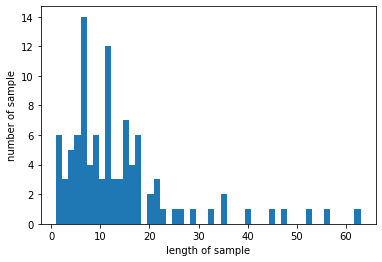

In [29]:
# 패딩 작업
# 패딩 작업은 정해준 길이로 모든 샘플들의 길이를 맞춤
# 길이가 정해준 길이보다 짧은 샘플들에는 pad 토큰을 추가하여 길이를 맞줌
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [30]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.
print(encoded[:3])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
